In [2]:
from scripts.deepgtav.messages import frame2numpy
import numpy as np
import pickle
import bunch
import gzip
import os
import cv2

%matplotlib inline
import matplotlib.pyplot as plt

# open the file
filepath = os.path.join(os.getcwd(), 'data')
filename = "dataset_mini.pz"
pfile = gzip.open(os.path.join(filepath, filename), mode='rb')

In [3]:
def apply_pca(image, dim=10):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = np.matrix(image)
    #U, S, V = np.linalg.svd(image)
    #reconst = np.matrix(U[:, :dim]) * np.diag(S[:dim]) * np.matrix(V[:dim, :])
    #reconst = reconst[...,None]
    image = image[...,None]
    return image

[(75, 100, 1), (75, 100, 3)]
dict_keys(['direction', 'throttle', 'brake', 'steering', 'speed', 'yawRate', 'location', 'minimap', 'frame'])


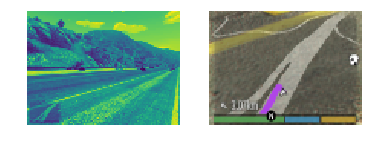

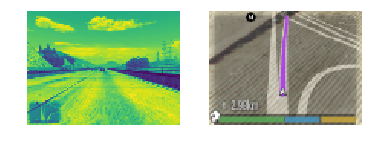

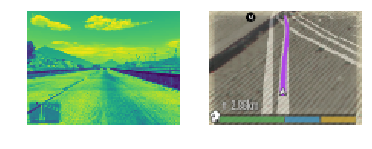

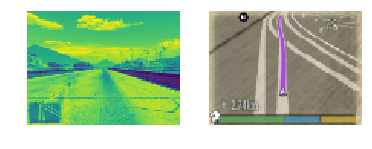

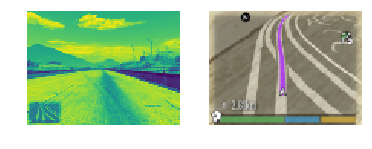

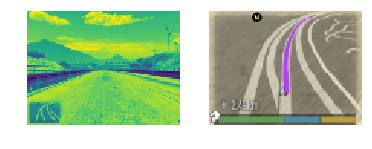

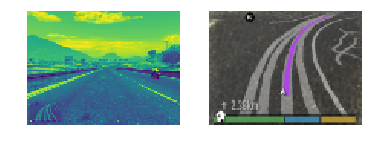

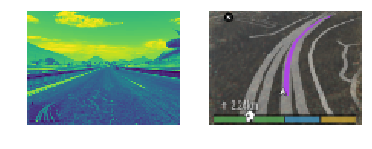

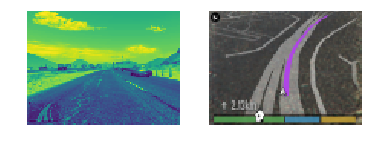

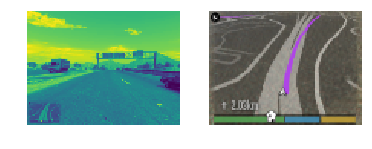

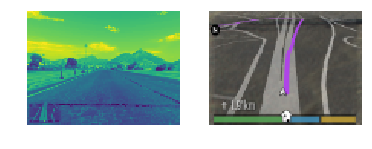

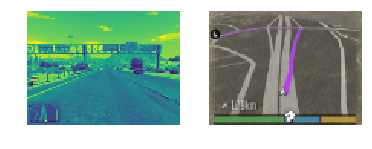

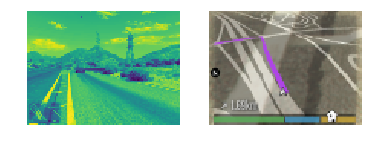

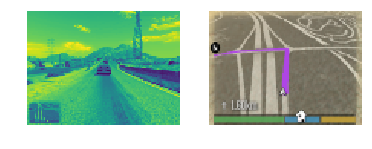

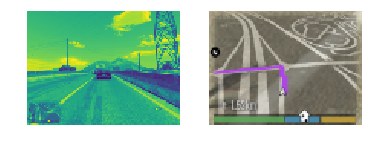

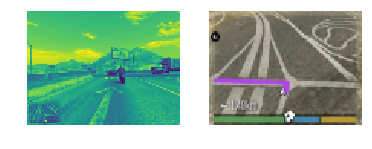

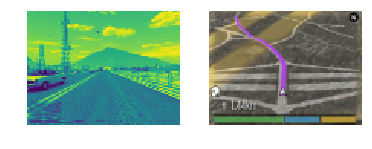

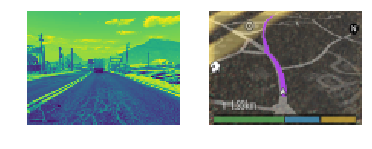

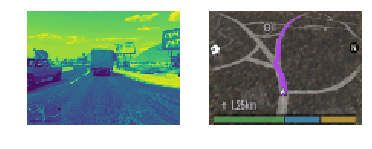

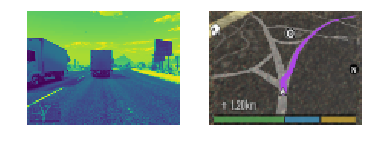

In [4]:
count = 0
no_of_channels = 3

frames_per_weather = 20000
reps_per_weather = 8
frames_per_rep = int(frames_per_weather/reps_per_weather)
image_size = (100, 75)     # required image size
minimap_size = (170, 110)  # current minimaps size

images = []
minimaps = []
outputs = []
speeds = []
yawRates = []

# find resize ratio
diff = []
diff.append(minimap_size[0] - image_size[0])
diff.append(minimap_size[1] - image_size[1])
ratio = 1- (np.min(diff) / minimap_size[np.argmin(diff)])

while True:
    try:
        
        # Load var from pickle
        var = pickle.load(pfile)
        
        # Skip first n frames
        count += 1
        # if count<3000: continue
            
        # Save image, minmap and steering
        image = var['frame']
        image = cv2.resize(image, (100,75))
        image = apply_pca(image, dim=50)
        images.append(image)
        
        minimap = var['minimap']
        minimap = cv2.resize(minimap, (100,75))
        minimap = minimap[:,:,:]
        minimaps.append(minimap)
        
        speeds.append(var['speed'])
        yawRates.append(var['yawRate'])
        # outputs.append([var['steering'], var['throttle'], var['brake']])
        outputs.append([var['steering']])
        
        # Display image
        if count % 100 == 0:
            plt.subplot(121); plt.imshow(image[:,:,0]); plt.axis('off')
            plt.subplot(122); plt.imshow(minimap[:,:,::-1]); plt.axis('off')
            plt.show()
        
        if count == 1: print([image.shape, minimap.shape]); print(var.keys())
        if count>5000: break
            
    except EOFError: break

In [5]:
x = np.array(images)
y = np.array(outputs)[:,0]

print([[np.min(entity), np.max(entity)] for entity in x])
if not isinstance(x, np.ndarray): 
    x_new = [(entity/255) for i, entity in enumerate(x)]
    if len(x)>=2: x_new = [*x_new, *x[2:]]
    x = x_new
[[np.min(entity), np.max(entity)] for entity in x]

[[18, 251], [18, 251], [19, 252], [18, 252], [19, 252], [17, 252], [17, 252], [17, 251], [16, 250], [18, 246], [17, 247], [18, 246], [18, 246], [20, 247], [21, 247], [21, 247], [22, 250], [20, 247], [22, 253], [23, 252], [24, 251], [24, 253], [24, 247], [24, 248], [22, 248], [26, 247], [27, 247], [26, 250], [27, 247], [27, 247], [27, 248], [26, 248], [28, 248], [25, 246], [29, 247], [27, 247], [33, 248], [32, 249], [33, 253], [30, 254], [22, 253], [26, 254], [22, 254], [24, 254], [26, 254], [25, 254], [25, 254], [20, 254], [24, 254], [23, 254], [26, 254], [30, 254], [24, 248], [30, 248], [27, 248], [27, 248], [24, 247], [27, 248], [26, 248], [24, 250], [23, 250], [23, 251], [26, 249], [25, 249], [42, 249], [46, 248], [42, 248], [45, 247], [45, 248], [42, 251], [43, 249], [44, 253], [42, 254], [39, 254], [38, 254], [46, 254], [51, 254], [37, 252], [39, 248], [41, 247], [33, 247], [31, 249], [38, 247], [34, 247], [34, 246], [37, 247], [33, 246], [29, 246], [29, 249], [28, 249], [25, 246]

[[18, 251],
 [18, 251],
 [19, 252],
 [18, 252],
 [19, 252],
 [17, 252],
 [17, 252],
 [17, 251],
 [16, 250],
 [18, 246],
 [17, 247],
 [18, 246],
 [18, 246],
 [20, 247],
 [21, 247],
 [21, 247],
 [22, 250],
 [20, 247],
 [22, 253],
 [23, 252],
 [24, 251],
 [24, 253],
 [24, 247],
 [24, 248],
 [22, 248],
 [26, 247],
 [27, 247],
 [26, 250],
 [27, 247],
 [27, 247],
 [27, 248],
 [26, 248],
 [28, 248],
 [25, 246],
 [29, 247],
 [27, 247],
 [33, 248],
 [32, 249],
 [33, 253],
 [30, 254],
 [22, 253],
 [26, 254],
 [22, 254],
 [24, 254],
 [26, 254],
 [25, 254],
 [25, 254],
 [20, 254],
 [24, 254],
 [23, 254],
 [26, 254],
 [30, 254],
 [24, 248],
 [30, 248],
 [27, 248],
 [27, 248],
 [24, 247],
 [27, 248],
 [26, 248],
 [24, 250],
 [23, 250],
 [23, 251],
 [26, 249],
 [25, 249],
 [42, 249],
 [46, 248],
 [42, 248],
 [45, 247],
 [45, 248],
 [42, 251],
 [43, 249],
 [44, 253],
 [42, 254],
 [39, 254],
 [38, 254],
 [46, 254],
 [51, 254],
 [37, 252],
 [39, 248],
 [41, 247],
 [33, 247],
 [31, 249],
 [38, 247],
 [34

In [6]:
print(x.shape)
print(y.shape)

(2000, 75, 100, 1)
(2000,)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.random, shuffle=True)

print()
print("Train Data | Test Data")
print(("{0:^10} | {1:^10}").format(y_train.shape[0], y_test.shape[0]))
print()


Train Data | Test Data
   1600    |    400    



In [8]:
def evaluate_model(model):
    print("\n\n")
    scores = model.evaluate(x_test, y_test)
    print("Accuracy: ", scores[1]*100, "%")
    return scores

In [9]:
import h5py
from keras.models import model_from_json
from keras.models import load_model
from keras import backend

path_models = os.path.join(os.getcwd(), 'test_model')
filename = 'model_000.h5'
file_path = path_models+'\\'+filename

def loss(y_true, y_pred): return backend.sum(backend.abs(y_true - y_pred))
def accuracy(y_true, y_pred): return 1 - backend.mean(backend.minimum(1.0,((backend.abs(y_true - y_pred))*10)))

model_loaded = load_model(file_path, custom_objects={'loss': loss, 'accuracy': accuracy})

c:\users\sambi\anaconda3\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
evaluate_model(model_loaded)




400/400 [==============================] - 20s 49ms/step
Accuracy:  32.56733727455139 %


[10.211966819763184, 0.3256733727455139, 0.007286295890808105]

In [19]:
y_pred = model_loaded.predict(x_test)
print(backend.get_value(loss(y_pred[0], y_test)))

113.9381248690483


In [18]:
np.abs(y_test - y_pred).shape

(400, 400)

In [22]:
y_test[0]

0.024318547030292893